# Star Wars Survey

## About project

The project is based on a dataset prepared by a team at FiveThirtyEight addressing american Star Wars fans. They received 835 total responses, it can be downloaded from their GitHub repository: https://github.com/fivethirtyeight/data/tree/master/star-wars-survey 
The dataset includes information if a responded saw the first six movies and how they rated them, ratings of the most popular characters, additional fandom information (for example knowledge of the Extended Universe or if they consider themselves to be fans).

Dataset contains also some sociodemographic data, so we'll try answer question like:
Does Education levels from the side of the fans, present themselves as a differentiator in the rating of the 6 Star Wars movies from the saga? Do we see differences in the fan base tastes when we segment the data in terms of age. We will explore the data also by certain binary segments like gender, fans vs non-fans.

After we performed some initial cleaning, we will plot a few interesting observations. 

So, let's examine how survey population responded. 


## Result

- Episodes 4-6 are generally ranked higher than Episodes 1-3. Star Wars fans are well aware of the importance of the Episode 5 - The Empire Strikes Back movie. Not only is this the most seen movie, but is the one ranked the highest. No love for the old trilogy. 
- 165 out of 471 respondents who saw all six episodes marked the Episode 5 their favourite one.
- Non Star Wars fans rank old trilogy (Episodes 1-3) higher than Star Wars fans do. Star Wars fans appreciate Episode 4 much more (there's significant difference in ranking of Episode 4). Females seem to enjoy Episodes 1 & 2 higher than males.
- Jar Jar is the most disliked character. Luke Skywalker, Obi Wan Kenobi, Han Solo, Yoda and Princess Leia Organa are top choices among respondents.
- Emperor Palpatine splits fans into likeing him or not and that makes him the most controversial character.
- Older people (>60 years) liked Episode 1 quite more (mean around 3), when groups aged 18-29 and 30-44 ranked it lower than 4. Episode 5 is still best ranked movie among all age groups.


## Loading data and initial inspection

In [1]:
import pandas as pd
import numpy as np

# jupyter command to show plots in notebook
%matplotlib inline

# setting pandas display options
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)
pd.set_option('max_colwidth', 50)

In [2]:
# import dataset, respondent ID is not a meaningful integer, thus imported as string
data = pd.read_csv("C:/Users/Asus/Downloads/star_wars.csv", encoding="ISO-8859-1", dtype={"RespondentID": "str"})
star_wars = data.copy()
star_wars.shape
# the dataset has 1187 records and 38 features

(1187, 38)

In [3]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
# removing all the NaN rows in the RespondentID col

#this removed row is a second header containing characters names for columns 15:29              
second_header = star_wars[star_wars["RespondentID"].isnull()] # save for later use
star_wars = star_wars[star_wars["RespondentID"].notnull()]  
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [5]:
# initial check of data
star_wars.describe()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,1186,1186,836,673,571,550,607,758,738,835,836,835,836,836,836,829,831,831,823,825,814,826,820,812,827,830,821,814,826,828,828,213,1068,1046,1046,858,1036,1043
unique,1186,2,2,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,3,2,2,2,2,4,5,5,9
top,3291019033,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,5,6,1,1,2,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very unfavorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,No,No,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,1,936,552,673,571,550,607,758,738,237,300,217,204,289,232,610,552,547,269,591,213,310,236,248,474,562,204,207,605,325,615,114,641,549,291,298,328,181


Noticeable data cleanliness issues:

- many column headers are not named properly
- some columns (e.g. unnamed: 4) only have one unique value - they should possibly be formatted as booleans
- binary variables ("Yes/No") are not formatted as booleans


## Cleaning the Dataset 


**Fixing values Yes / No formatting to boolean**

In [6]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?",
    "Are you familiar with the Expanded Universe?",
    "Do you consider yourself to be a fan of the Expanded Universe?æ",
    "Do you consider yourself to be a fan of the Star Trek franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)
    

# Checking the results:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(
dropna=False)
    
#TimALbers -> different approach

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
#renaming Yes/No columns so they're displayed in a shorter form

rename_yn_cols = {"Have you seen any of the 6 films in the Star Wars franchise?":"Saw any Star Wars movie",
               "Do you consider yourself to be a fan of the Star Wars film franchise?":"StarWars fan",
               "Are you familiar with the Expanded Universe?": "Knows Expanded Universe",
               "Do you consider yourself to be a fan of the Expanded Universe?æ": "Fan of Expanded Universe",
               "Do you consider yourself to be a fan of the Star Trek franchise?": "Fan of the Star Trek"}
star_wars.rename(columns=rename_yn_cols,inplace=True)

star_wars.head()

,RespondentID,Saw any Star Wars movie,StarWars fan,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Knows Expanded Universe,Fan of Expanded Universe,Fan of the Star Trek,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [8]:
# fixing columns on whether or not a person saw the movies, changing the content of the cols from a str to a boolean type
# if record contains movie's title it means it was seen by respondent
#(turns out first four titles have double spacing between number of episode and rest of the title)

movies = {
    "Star Wars: Episode I  The Phantom Menace": True, 
    "Star Wars: Episode II  Attack of the Clones": True, 
    "Star Wars: Episode III  Revenge of the Sith": True, 
    "Star Wars: Episode IV  A New Hope": True, 
    "Star Wars: Episode V The Empire Strikes Back": True, 
    "Star Wars: Episode VI Return of the Jedi": True, np.NaN: False
}
seen_columns = star_wars.columns[3:9]
for col in seen_columns:
    star_wars[col] = star_wars[col].map(movies)


In [9]:
# Extracting and checking the Dataset columns
star_wars.columns

Index(['RespondentID', 'Saw any Star Wars movie', 'StarWars fan',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?', 'Knows Expanded Universe',
       'Fan of Expanded Universe', 'Fan of the Star Trek', 'Gender', 'Age',
       'Household Income', 'Education', 'Loc

In [10]:
#renaming the cols that correspond to the movies seen by the Star Wars fans from Unnamed to seen, 
#adding to it a numeric value that corresponds to each of the 6 Episodes from the saga. e.g., seen_1 == seen Episode I

star_wars = star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1", 
                          "Unnamed: 4": "seen_2", "Unnamed: 5": "seen_3", "Unnamed: 6": "seen_4", "Unnamed: 7": "seen_5", "Unnamed: 8": "seen_6"})
        
        

In [11]:
#another way to clean "seen columns"
# star_wars = star_wars.rename(columns={
#                 'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_Ep.1',
#                 'Unnamed: 4': 'seen_Ep.2',
#                 'Unnamed: 5': 'seen_Ep.3',
#                 'Unnamed: 6': 'seen_Ep.4',
#                 'Unnamed: 7': 'seen_Ep.5',
#                 'Unnamed: 8': 'seen_Ep.6'http://localhost:8888/notebooks/Star_Wars_Survey.ipynb#
#                                     })

# movies = [
#     'Star Wars: Episode I  The Phantom Menace', 
#     'Star Wars: Episode II  Attack of the Clones',
#     'Star Wars: Episode III  Revenge of the Sith',
#     'Star Wars: Episode IV  A New Hope',
#     'Star Wars: Episode V The Empire Strikes Back',
#     'Star Wars: Episode VI Return of the Jedi'    
# ]

# for n in np.arange(6):
#     col = 'seen_Ep.{}'.format(n+1)
#     star_wars[col] = star_wars[col].map({
#     movies[n]: True, np.NaN: False})

    
# # Checking and validating the previous changes in the Dataset:
# for n in np.arange(6):
#     col = 'seen_Ep.{}'.format(n+1)
#     print(star_wars[col].value_counts().sum() == star_wars.shape[0])
#     print(star_wars[col].value_counts())    

**Cleaning ranking columns**


Columns 9 to 15 rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [12]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Checking the outcome of the operation:
print(star_wars[star_wars.columns[9:15]].dtypes)

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    float64
Unnamed: 10                                                                                                                                      float64
Unnamed: 11                                                                                                                                      float64
Unnamed: 12                                                                                                                                      float64
Unnamed: 13                                                                                                                                      float64
Unnamed: 14                                                                                                                                      float64
dtype: object


In [13]:
star_wars = star_wars.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1", 
                          "Unnamed: 10": "ranking_2", "Unnamed: 11": "ranking_3", "Unnamed: 12": "ranking_4", "Unnamed: 13": "ranking_5", "Unnamed: 14": "ranking_6"})
        
        

**Renaming character_name columns**, so the become more intuitive

Taking character names from second header row, which was previously dropped


In [14]:
character_cols = star_wars.columns[15:29]
character_headers = second_header.iloc[:,15:29].transpose().reset_index() 

print(character_headers)

                                                index                     0
0   Please state whether you view the following ch...              Han Solo
1                                         Unnamed: 16        Luke Skywalker
2                                         Unnamed: 17  Princess Leia Organa
3                                         Unnamed: 18      Anakin Skywalker
4                                         Unnamed: 19        Obi Wan Kenobi
5                                         Unnamed: 20     Emperor Palpatine
6                                         Unnamed: 21           Darth Vader
7                                         Unnamed: 22      Lando Calrissian
8                                         Unnamed: 23             Boba Fett
9                                         Unnamed: 24                 C-3P0
10                                        Unnamed: 25                 R2 D2
11                                        Unnamed: 26         Jar Jar Binks
12          

In [15]:
rename_characters = dict()
for old, new in zip(character_headers["index"],character_headers[0]):
    rename_characters[old] = new

print(rename_characters)

{'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo', 'Unnamed: 16': 'Luke Skywalker', 'Unnamed: 17': 'Princess Leia Organa', 'Unnamed: 18': 'Anakin Skywalker', 'Unnamed: 19': 'Obi Wan Kenobi', 'Unnamed: 20': 'Emperor Palpatine', 'Unnamed: 21': 'Darth Vader', 'Unnamed: 22': 'Lando Calrissian', 'Unnamed: 23': 'Boba Fett', 'Unnamed: 24': 'C-3P0', 'Unnamed: 25': 'R2 D2', 'Unnamed: 26': 'Jar Jar Binks', 'Unnamed: 27': 'Padme Amidala', 'Unnamed: 28': 'Yoda'}


In [16]:
star_wars.rename(columns=rename_characters, inplace=True)

In [17]:
#https://stackoverflow.com/questions/27438216/zip-list-too-many-items-to-unpack

In [18]:
# star_wars = star_wars.rename(columns={"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo", 
#                                     "Unnamed: 16": "Luke Skywalker", "Unnamed: 17": "Princess Leia Organa", "Unnamed: 18": "Anakin Skywalker", "Unnamed: 19": "Obi Wan Kenobi", 
#                                     "Unnamed: 20": "Emperor Palpatine", "Unnamed: 21": "Darth Vader", "Unnamed: 22": "Lando Calrissian", "Unnamed: 23": "Boba Fett", "Unnamed: 24": "C-3P0", 
#                                     "Unnamed: 25": "R2 D2", "Unnamed: 26": "Jar Jar Binks", "Unnamed: 27": "Padme Amidala", "Unnamed: 28": "Yoda"})

In [19]:
#Verifying the changes
star_wars.iloc[:,15:29].head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [20]:
# checking the final data
star_wars.info()
star_wars.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                   1186 non-null object
Saw any Star Wars movie        1186 non-null bool
StarWars fan                   836 non-null object
seen_1                         1186 non-null bool
seen_2                         1186 non-null bool
seen_3                         1186 non-null bool
seen_4                         1186 non-null bool
seen_5                         1186 non-null bool
seen_6                         1186 non-null bool
ranking_1                      835 non-null float64
ranking_2                      836 non-null float64
ranking_3                      835 non-null float64
ranking_4                      836 non-null float64
ranking_5                      836 non-null float64
ranking_6                      836 non-null float64
Han Solo                       829 non-null object
Luke Skywalker                 831 non-null object
Princess Leia Organa      

,RespondentID,Saw any Star Wars movie,StarWars fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Knows Expanded Universe,Fan of Expanded Universe,Fan of the Star Trek,Gender,Age,Household Income,Education,Location (Census Region)
count,1186,1186,836,1186,1186,1186,1186,1186,1186,835.000,836.000,835.000,836.000,836.000,836.000,829,831,831,823,825,814,826,820,812,827,830,821,814,826,828,828,213,1068,1046,1046,858,1036,1043
unique,1186,2,2,2,2,2,2,2,2,nan,nan,nan,nan,nan,nan,6,6,6,6,6,6,6,6,6,6,6,6,6,6,3,2,2,2,2,4,5,5,9
top,3291019033,True,True,True,False,False,True,True,True,nan,nan,nan,nan,nan,nan,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very unfavorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,False,False,False,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,1,936,552,673,615,636,607,758,738,nan,nan,nan,nan,nan,nan,610,552,547,269,591,213,310,236,248,474,562,204,207,605,325,615,114,641,549,291,298,328,181
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.733,4.087,4.341,3.273,2.513,3.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.656,1.365,1.400,1.826,1.579,1.667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,1.000,1.000,1.000,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000,3.000,3.000,2.000,1.000,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000,4.000,5.000,3.000,2.000,3.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000,5.000,6.000,5.000,3.000,4.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Detailed questions on Star Wars were skipped, if a person did not watch any of the six movies. Let's see how we can filter out and fix the relevant records.


In [21]:
# I have decided only participants that have actually seen a Star Wars movie to be included in the analysis
star_wars = star_wars[star_wars["Saw any Star Wars movie"]==True]

star_wars.shape

(936, 38)

In [22]:
# For several respondends, nearly all of their inforamtion, including socio-economic factors are missing 
# we will drop these records
star_wars.dropna(inplace=True,subset=["Gender"])

star_wars.shape

(820, 38)

In [23]:
# Whether or not a respondent is a fan of the Extended Univsere is often left out,
# only for participants familiar with Expanded Universe an anwser to this question was recorded
# we will therefore assume, that someone who did not know about the Expanded Universe is also not a fan

star_wars.loc[star_wars["Knows Expanded Universe"]==False,"Fan of Expanded Universe"] = False

In [24]:
# In some cases the charachter evaluate is NaN, we will assume that the respondents in
# these cases did not know the character and assign the respective answer
star_wars.loc[:,"Han Solo":"Yoda"] = star_wars.loc[:,"Han Solo":"Yoda"].fillna("Unfamiliar (N/A)")

In [25]:
string = "{} out of 820 remaining respondents chose not to disclose their income"
print(string.format(star_wars["Household Income"].isnull().sum()))

145 out of 820 remaining respondents chose not to disclose their income


In [26]:
#since this is not an important feature, we will keep and mark the missing info
star_wars["Household Income"] = star_wars["Household Income"].fillna("no info")

In [27]:
# Let's now drop a few records which still have some missing info instead of fixing them 1 by 1
star_wars.dropna(inplace=True)
star_wars.shape

(812, 38)

After we cleaned and imputed values as described in the above code cell, the data now looks like it is ready for further analysis. We have removed ca. 300 records from our analysis, but these held almost no information for our further analysis.

# Analysis and visualizing the results

## Question 1.

**Which movie is the best?**

To do this, we take the mean of each of the ranking columns.

In [28]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1   3.745
ranking_2   4.103
ranking_3   4.347
ranking_4   3.266
ranking_5   2.504
ranking_6   3.034
dtype: float64

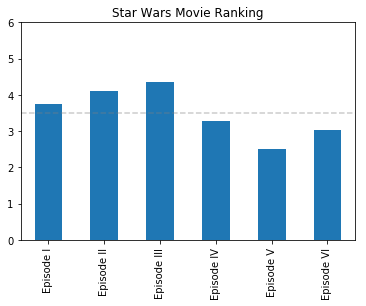

In [29]:
import matplotlib.pyplot as plt
 
ranking = star_wars[star_wars.columns[9:15]].mean()                     #or star_wars.iloc[:, 9:15].mean()
plot1 = ranking.plot(kind="bar", title="Star Wars Movie Ranking", ylim=(0, 6))
plt.xticks(
    np.arange(6),
    ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"],
)

#an average graph line:
plot1.axhline(ranking.mean(),
alpha=.4, linestyle='--', color='grey')
plt.show()


# szybki plot
# plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())   

From analyzing the bar graph above, we can see that Star Wars: Episode V The Empire Strikes Back has the lowest number and thus is the highest ranked movie (the 1 means the most favorite and 6 means it was the least favorite, the lower number the better ranking).
The "original" movies are rated much lower than the newer ones.

** --- Ranking by a gender**

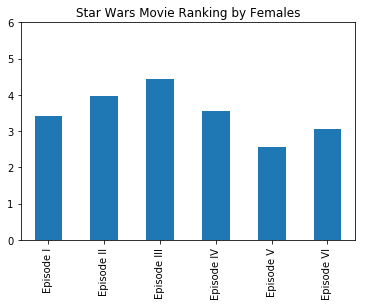

In [30]:
females = star_wars[star_wars["Gender"] == "Female"]

ranking = females.iloc[:, 9:15].mean()
ranking.plot(kind="bar", title="Star Wars Movie Ranking by Females", ylim=(0, 6))
plt.xticks(
    np.arange(6),
    ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"],
)
plt.show()

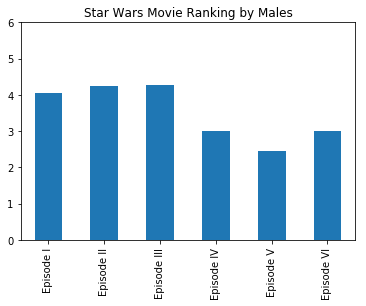

In [31]:
males = star_wars[star_wars["Gender"] == "Male"]

ranking = males.iloc[:, 9:15].mean()
ranking.plot(kind="bar", title="Star Wars Movie Ranking by Males", ylim=(0, 6))
plt.xticks(
    np.arange(6),
    ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"],
)
plt.show()

We can see that Episode V was the highest ranked movie among males and females. Females seem to enjoy Episode 1 more than males. It is the other way around for Episode 3. Episode 3 features a darker tone and is more violent.

**---  Star Wars fans vs. non-fans**

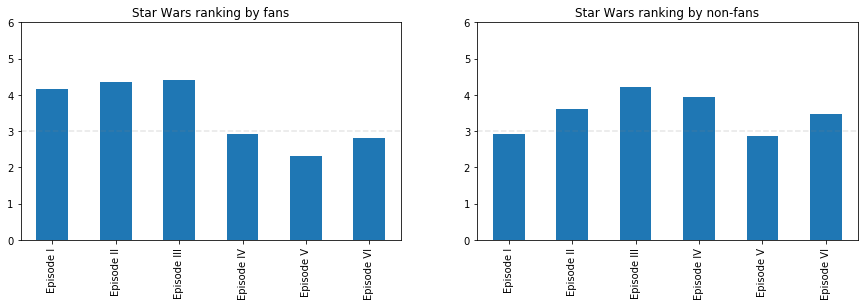

In [32]:
fig = plt.figure(figsize=(15,4))

fans = star_wars[star_wars["StarWars fan"] == True]
non_fans = star_wars[star_wars["StarWars fan"] == False]

ax1 = fig.add_subplot(1, 2, 1)
fans_ranking = fans.iloc[:, 9:15].mean()
ax1 = fans_ranking.plot(kind="bar", title="Star Wars ranking by fans", ylim=(0, 6))
plt.xticks(
    np.arange(6),
    ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])

ax2 = fig.add_subplot(1, 2, 2)
non_fans_ranking = non_fans.iloc[:, 9:15].mean()
ax2 = non_fans_ranking.plot(kind="bar", title="Star Wars ranking by non-fans", ylim=(0, 6))
plt.xticks(
    np.arange(6),
    ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])

ax1.axhline(y=3,alpha=.2, linestyle='--', color='grey')
ax2.axhline(y=3,alpha=.2, linestyle='--', color='grey')

plt.show()


**--- Which movie is ranked the best if respondent has seen every “Star Wars”?** 

We take the subset of 471 respondents  to rank them from best to worst.

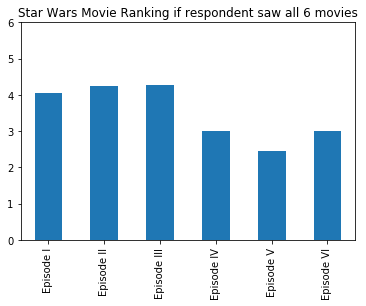

In [33]:
seen_all = star_wars[(star_wars["seen_1"] == True) & (star_wars["seen_2"] == True) & (star_wars["seen_3"] == True) & 
                     (star_wars["seen_4"] == True) & (star_wars["seen_5"] == True) & (star_wars["seen_6"] == True)]
seen_all[star_wars.columns[9:15]].mean()
ranking.plot(kind="bar", title="Star Wars Movie Ranking if respondent saw all 6 movies", ylim=(0, 6))
plt.xticks(
    np.arange(6),
    ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"],
)

plt.show()

**--- Which movie is ranked the best by a group age** 

Digging a little bit deeper, we want to check if age affects the ranking (respondents around 30's onwards might lean to the oldest movies from the Star Wars saga, as these movies are the ones from their teen age or young adult age and have greater influence on them).


In [34]:
# Analysing the Age column from our Dataset:
star_wars['Age'].value_counts().sort_values()

18-29    178
> 60     190
30-44    206
45-60    238
Name: Age, dtype: int64

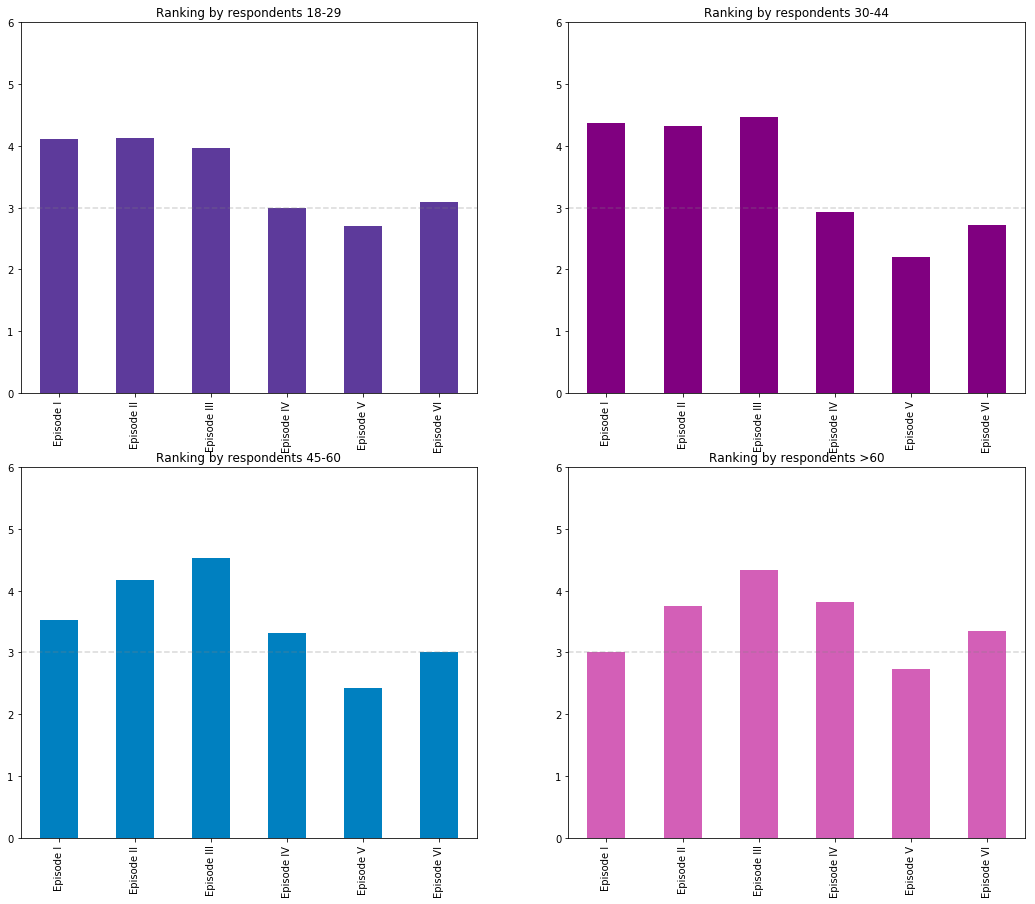

In [35]:
fig = plt.figure(figsize=(18,15))

ax1 = fig.add_subplot(2, 2, 1)
under_30 = star_wars[star_wars["Age"] == "18-29"]
ranking_30 = under_30.iloc[:, 9:15].mean()

ax1 = ranking_30.plot(kind="bar", title="Ranking by respondents 18-29", ylim=(0, 6), color=(93/255,58/255,155/255))
plt.xticks(
    np.arange(6),
    ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])

ax2 = fig.add_subplot(2, 2, 2)
age_30_44 = star_wars[star_wars["Age"] == "30-44"]
ranking_30_44 = age_30_44.iloc[:, 9:15].mean()

ax2 = ranking_30_44.plot.bar(title="Ranking by respondents 30-44", ylim=(0, 6), color=(128/255,0/255,128/255))
plt.xticks(
    np.arange(6),
    ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])

ax3 = fig.add_subplot(2, 2, 3)
age_45_60 = star_wars[star_wars["Age"] == "45-60"]
ranking_45_60 = age_45_60.iloc[:, 9:15].mean()

ax3 = ranking_45_60.plot.bar(title="Ranking by respondents 45-60", ylim=(0, 6), color=(0/255,128/255,192/255))
plt.xticks(
    np.arange(6),
    ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])

ax4 = fig.add_subplot(2, 2, 4)
age_60plus = star_wars[star_wars["Age"] == "> 60"]
ranking_60plus = age_60plus.iloc[:, 9:15].mean()

ax4 = ranking_60plus.plot.bar(title="Ranking by respondents >60", ylim=(0, 6), color=(211/255,95/255,183/255))
plt.xticks(
    np.arange(6),
    ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])

ax1.axhline(y=3,alpha=.3, linestyle='--', color='grey')
ax2.axhline(y=3,alpha=.3, linestyle='--', color='grey')
ax3.axhline(y=3,alpha=.3, linestyle='--', color='grey')
ax4.axhline(y=3,alpha=.3, linestyle='--', color='grey')

plt.show()


Respondents 30-44 rank the older trilogy (Episode 1-3) lower than fans in their 18-29 do (reminder: 1 is the best).

## Question 2.

**What was the most seen movie of all?**

In [36]:
for n in np.arange(6):
    col = 'seen_{}'.format(n+1)
    print(star_wars[col].value_counts().sum() == star_wars.shape[0])
    print(star_wars[col].value_counts())

True
True     655
False    157
Name: seen_1, dtype: int64
True
True     555
False    257
Name: seen_2, dtype: int64
True
True     535
False    277
Name: seen_3, dtype: int64
True
True     592
False    220
Name: seen_4, dtype: int64
True
True     737
False     75
Name: seen_5, dtype: int64
True
True     719
False     93
Name: seen_6, dtype: int64


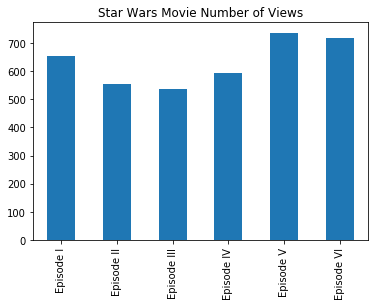

In [37]:
star_wars.iloc[:, 3:9].sum().plot(
    kind="bar", title="Star Wars Movie Number of Views",
)
plt.xticks(
    np.arange(6),
    ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"],
)
plt.show()

**Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**
We can see from the graph that Star Wars: Episode V The Empire Strikes Back not only has the highest ranking, but also os the most viewed movie.

In [38]:
episode_5 = seen_all.apply(lambda x: True if x["ranking_5"] == 1 else False, axis=1)
num_rows5 = len(episode_5[episode_5 == True].index)

string = "{} out of 471 respondents who saw all six movies marked the movie their favourite one"
print(string.format(num_rows5))

165 out of 471 respondents who saw all six movies marked the movie their favourite one


In [39]:
#second version to see likes of all movies
# most_liked = {}

# for m in star_wars.columns[9:15]:
#     num_of_ones = 0 
#     for row in seen_all[m]:  
#         if row == 1:
#             num_of_ones += 1
        
#         most_liked[m]= num_of_ones
    
# print(most_liked)

## Question 3. 

**How likeable are the characters?**

In [40]:
characters_col = star_wars.columns[15:29]
best_character = {}
for c in characters_col:
    num_of_likes = 0
    for row in star_wars[c]:  
        if row =="Very favorably" or row =="Somewhat favorably":     
            num_of_likes += 1 
             
        best_character[c] = num_of_likes   

print(best_character)                 

{'Han Solo': 742, 'Luke Skywalker': 750, 'Princess Leia Organa': 738, 'Anakin Skywalker': 500, 'Obi Wan Kenobi': 731, 'Emperor Palpatine': 244, 'Darth Vader': 469, 'Lando Calrissian': 356, 'Boba Fett': 281, 'C-3P0': 682, 'R2 D2': 726, 'Jar Jar Binks': 231, 'Padme Amidala': 338, 'Yoda': 731}


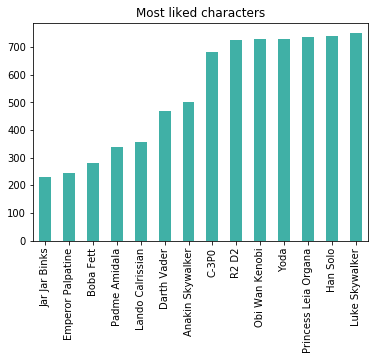

In [41]:
#we cannoct directly plot a dictionary in matplotlib (it needs x values and y values)

best_characters = pd.Series(best_character).sort_values()
top = best_characters.nlargest
best_characters.plot(
    kind="bar", title="Most liked characters", color=(64/255,176/255,166/255)
)
plt.show()



In [42]:
best_characters.nlargest(6)

Luke Skywalker          750
Han Solo                742
Princess Leia Organa    738
Obi Wan Kenobi          731
Yoda                    731
R2 D2                   726
dtype: int64

Characters like Luke Skywalker; Obi Wan Kenobi; Han Solo; Yoda and Princess Leia Organa are top choices.

**--- Which characters are the most and the least loved among the Star Wars fans?**

In [43]:
best_character_fans = {}
fans = star_wars[star_wars["StarWars fan"] == True]
for c in characters_col:
    num_of_likes = 0
    for row in fans[c]:  
        if row =="Very favorably" or row =="Somewhat favorably":     
            num_of_likes += 1 
             
        best_character_fans[c] = num_of_likes   

print(sorted(best_character_fans, key=best_character_fans.get, reverse=True)[:5])

# other solution       
# import heapq
# five_best = heapq.nlargest(5, best_character_fans, key=best_character_fans.get)            
# print(five_best)

['Han Solo', 'Luke Skywalker', 'Obi Wan Kenobi', 'Princess Leia Organa', 'Yoda']


There's no significants changes in ranking among Star Wars fans.

In [44]:
least_loved_character= {}
for c in characters_col:
    num_of_unlikes = 0
    for row in star_wars[c]:  
        if row =="Somewhat unfavorably" or row =="Very unfavorably":     
            num_of_unlikes += 1 
             
        least_loved_character[c] = num_of_unlikes   
      
print(sorted(least_loved_character, key=least_loved_character.get, reverse=True)[:5])


['Jar Jar Binks', 'Darth Vader', 'Emperor Palpatine', 'Boba Fett', 'Anakin Skywalker']


Jar Jar Binks is the most disliked character.

The stacked graph below shows the most controversial character, Emperor Palpatine splits fans into likeing him or not.

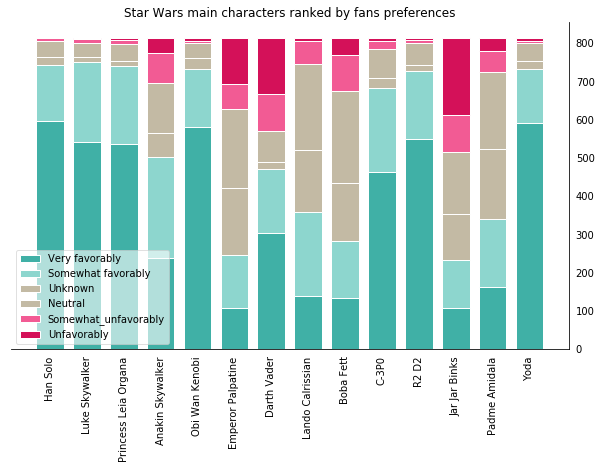

In [45]:
star_wars_characters = star_wars[star_wars.columns[15:29]].copy()

fig, ax = plt.subplots(figsize=(10,6))
characters = star_wars_characters.columns.values

r = np.arange(len(characters))
bar_w = .75

Very_favorably = (star_wars_characters == 'Very favorably').sum()
Somewhat_favorably = (star_wars_characters == 'Somewhat favorably').sum() 
Somewhat_unfavorably = (star_wars_characters == 'Somewhat unfavorably').sum()          
Very_Unfavorably = (star_wars_characters == 'Very unfavorably').sum()
Neutral = (star_wars_characters == 'Neither favorably nor unfavorably (neutral)').sum()
Unknown = (star_wars_characters == 'Unfamiliar (N/A)').sum()

# Plotting a stacked bar graph 

plt.bar(r, Very_favorably[r], color=(64/255,176/255,166/255), edgecolor='white', width = bar_w)
plt.bar(r, Somewhat_favorably[r], bottom = Very_favorably[r], color=(141/255,214/255,206/255), edgecolor='white', width = bar_w)
plt.bar(r, Unknown[r], bottom=(Very_favorably[r]+ Somewhat_favorably[r]), color=(195/255,186/255,164/255), 
        edgecolor='white', width = bar_w)
plt.bar(r, Neutral [r], bottom=(Very_favorably[r]+ Somewhat_favorably[r] + Unknown[r]), color=(195/255,186/255,164/255), 
        edgecolor='white', width = bar_w)
plt.bar(r, Somewhat_unfavorably[r], bottom=Very_favorably[r]+ Somewhat_favorably[r] + Unknown[r] + Neutral[r], 
        color=(242/255,91/255,148/255), edgecolor='white', width = bar_w)
plt.bar(r, Very_Unfavorably[r], bottom=(Very_favorably[r]+ Somewhat_favorably[r] + Unknown[r] + Neutral[r] + 
        Somewhat_unfavorably[r]), color=(212/255,17/255,89/255), edgecolor='white',width = bar_w)
plt.xticks(r, characters, rotation=90)
ax.yaxis.tick_right()

# Removing the ticks from the graph:
ax.tick_params(bottom='off', top='off', left='off', right='off')

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# # Removing the spines from our graph:
# for key, spine in ax.spines.items():
#     spine.set_visible(False)
    
# Setting up a legend box for our bar graph:
plt.legend(
loc='best',
labels=('Very favorably', 'Somewhat favorably', 'Unknown', 'Neutral', 'Somewhat_unfavorably', 'Unfavorably'),
ncol=1, fancybox=True, framealpha=.6)

# Setting a graph title:
ax.set_title('Star Wars main characters ranked by fans preferences', fontsize=12)

# Displaying the graph:
plt.show()


**Potential next steps:**

- Segmenting the data based on columns like Education, Location (Census Region).
- After going through several types of visualizations (including violin and histograms with "overlay"-barmode), I'll try to make an interactive chart (boxplot). I try to usey nbextension to avoid having to make many similar plots. I got the idea from this great Medium post.
- trying melted tables to enable quicker analysis
...then i'll answer potential next questions.



Looking for feedback on your project? Or maybe you'd like to show it off? 

Head over to our Community to share your finished Guided Project! You can also view your peers' completed notebooks to see how they approached the project.